# Boston Dataset
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

There are 14 attributes in each case of the dataset. They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per USD 10.000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

The objective is to create a tool to estimate MEDV of a house

In [71]:
import pandas as pd
import numpy as np
from pandas.plotting import table
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [98]:
data.shape

(506, 16)

In [73]:
def data_cleaning(data):
  unique_values = []
  na_values = []
  null_values = []
  columns = []

  for column in data.columns.values:
    unique_values.append(len(np.unique(data[column])))
    na_values.append(list(data[column].isna()).count(True))
    null_values.append(list(data[column].isnull()).count(True))
    columns.append(column)

  data_validated = pd.DataFrame(index=columns) 
  data_validated["unique_values"] = list(unique_values)
  data_validated["na_values"] = list(na_values)
  data_validated["null_values"] = list(null_values)
  return data_validated

In [74]:
data_cleaning(data)

,unique_values,na_values,null_values
crim,504,0,0
zn,26,0,0
indus,76,0,0
chas,2,0,0
nox,81,0,0
rm,446,0,0
age,356,0,0
dis,412,0,0
rad,9,0,0
tax,66,0,0


In [75]:
np.unique(data["rad"])

array([ 1,  2,  3,  4,  5,  6,  7,  8, 24])

In [76]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
target

'medv'

In [77]:
X = data[predictors]
Y = data[target]

In [78]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [79]:
pd.DataFrame(Y.head())

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=3, random_state=0)


In [82]:
regtree.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [83]:
preds = regtree.predict(data[predictors])

In [84]:
data["preds"]=preds

In [85]:
data[["preds","medv"]].head()

,preds,medv
0,23.466667,24.0
1,22.920833,21.6
2,34.155556,34.7
3,34.155556,33.4
4,34.155556,36.2


In [86]:
from sklearn.tree import export_graphviz
with open("boston_rtree.dot","w") as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [87]:
import os
from graphviz import Source
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


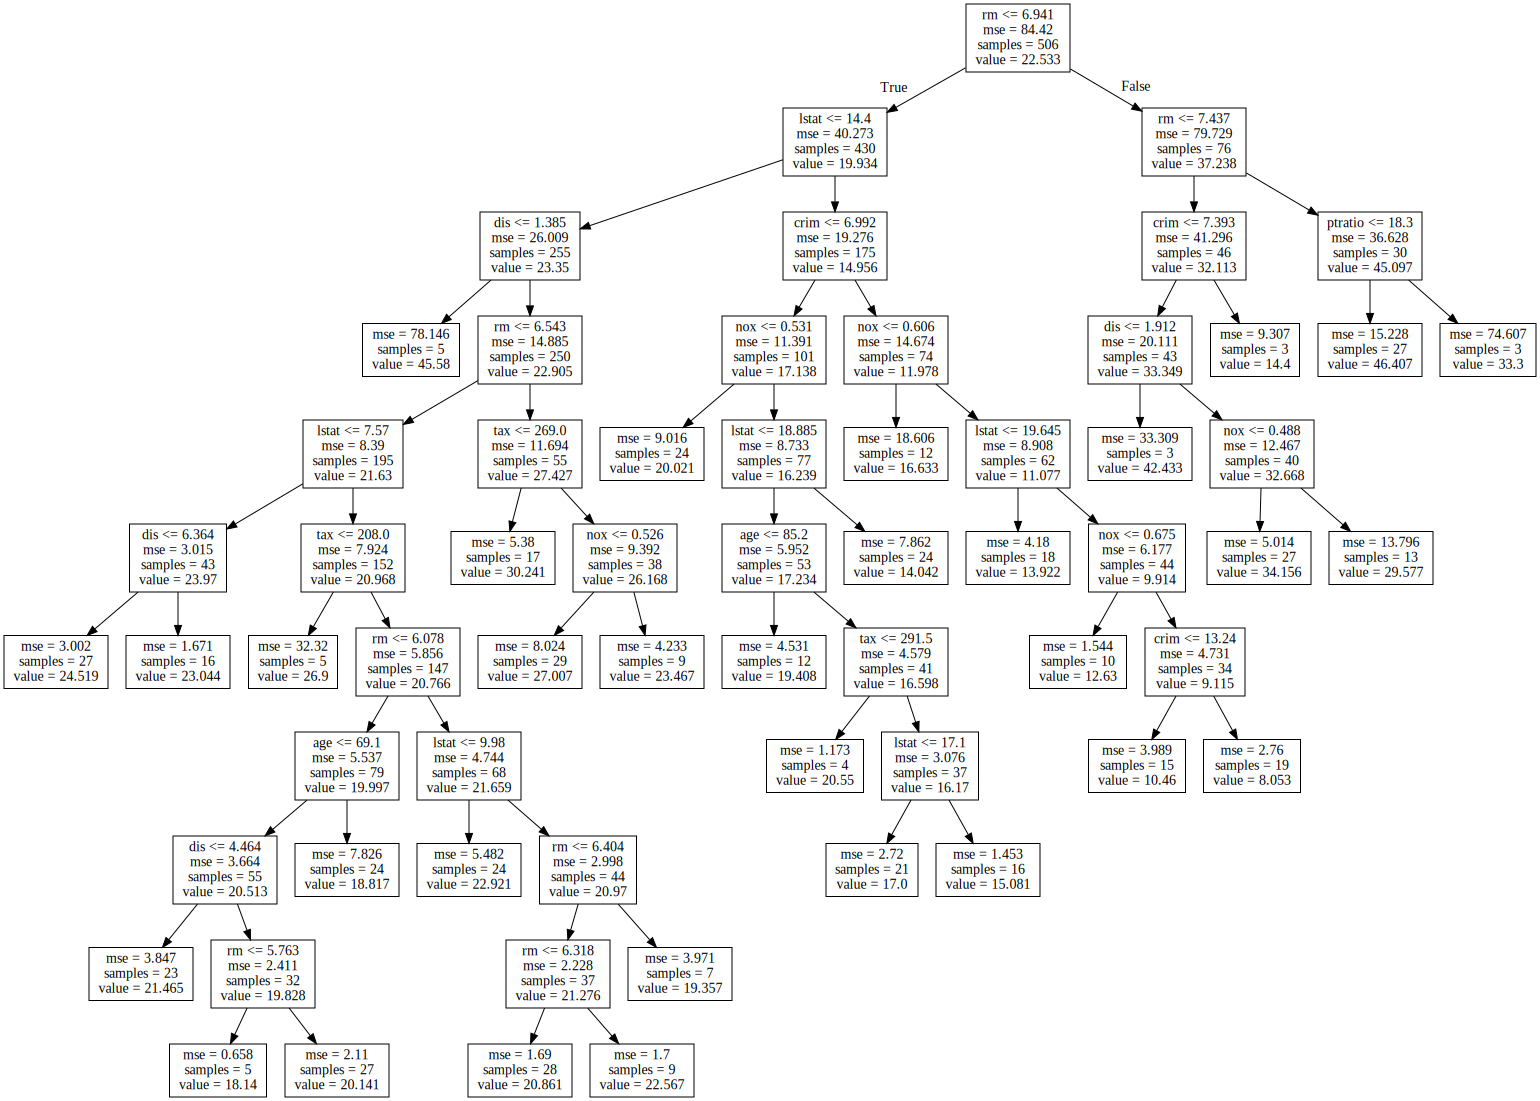

In [88]:
file = open("boston_rtree.dot","r")
text = file.read()
Source(text)

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [90]:
cv = KFold(n_splits=10,shuffle=True,random_state=0)
#cv = 10
scores = cross_val_score(regtree,X,Y,scoring="neg_mean_squared_error",cv=cv,n_jobs=2)
print(scores)
score = np.mean(scores)
print(score)

[-43.02836579 -13.81470429 -12.27500282  -8.98091734 -21.461522
 -10.00079345 -45.59622159 -18.33421022 -10.77735855  -9.40185161]
-19.367094765255267


In [91]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.05608790988040343),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.023986807838404532),
 ('rm', 0.6140565728974396),
 ('age', 0.003106013700749565),
 ('dis', 0.07276557587983831),
 ('rad', 0.0),
 ('tax', 0.011410684654157755),
 ('ptratio', 0.011867632868465781),
 ('black', 0.0),
 ('lstat', 0.206718802280541)]

### Regression Random forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
forest = RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=1000)
forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [95]:
data["Random forest result"]=forest.oob_prediction_
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds,Random forest result
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,23.466667,28.205650
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.920833,22.903325
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.155556,34.656831
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.155556,34.787500
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,34.155556,34.239118


In [96]:
data[['medv','Random forest result']]

,medv,Random forest result
0,24.0,28.205650
1,21.6,22.903325
2,34.7,34.656831
3,33.4,34.787500
4,36.2,34.239118
...,...,...
501,22.4,24.288857
502,20.6,19.481662
503,23.9,28.372145
504,22.0,26.345623


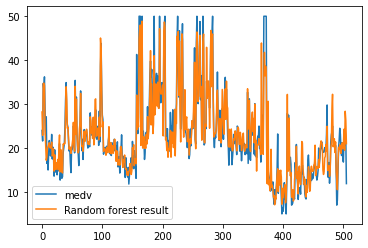

In [97]:
data[['medv','Random forest result']].plot()

#### To evaluate performance of a random forest model, mean squared (MSE) error is calculated

In [54]:
data["error_random_forest"]=(data["medv"]-data["Random forest result"])**2
error_random_forest = sum(data["error_random_forest"])/len(data)
error_random_forest

10.431902749715212

Error in random forest model is lower than error regression decision trees.

#### R2 in random forest model

In [56]:
forest.oob_score_

0.8764278891680323